In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("./loan_approval_data.csv")
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [6]:
df.isnull().sum()

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

In [7]:
df.describe()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


## As part of Data preprocessing, Handle missing values


### How to handle missing values in categorical features(columns)
### How to handle missing values in Numerical features(columns)

## There are different ways to do the above

## For categorical features, it makes more sense to fill mode values for missing values
### Mode is the most frequent value in the entire column for that feature
## For Numerical features, it makes more sense to fill mean or median for missing values
### Mostly it is Mean, unless you have aany particular reason to use median to fill the values

In [8]:
categorical_cols = df.select_dtypes(include=["object"]).columns
# numerical_cols = df.select_dtypes(include=["float64"]).columns
numerical_cols = df.select_dtypes(include=["number"]).columns
# Inculding number will filter all numerical values columns, ["float64, int64"] like this also it can be used

In [9]:
categorical_cols

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [10]:
numerical_cols

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

In [11]:
numerical_cols.size+categorical_cols.size

20

## To fill the values in the columns, we can use imputer from sklearn
### Imputer is used to complete missing values with simple strategies
### Replace missing values using a descriptive statistic (e.g mean, median, or most frequent)
### along each column, or using a constant value

In [12]:
from sklearn.impute import SimpleImputer

# We need to create 2 imputers as we want to use it for 2 types of strategies
num_imputer = SimpleImputer(strategy="mean")
df[numerical_cols]=num_imputer.fit_transform(df[numerical_cols])

In [13]:
df.head()
print(df.isnull().sum())

Applicant_ID           0
Applicant_Income       0
Coapplicant_Income     0
Employment_Status     50
Age                    0
Marital_Status        50
Dependents             0
Credit_Score           0
Existing_Loans         0
DTI_Ratio              0
Savings                0
Collateral_Value       0
Loan_Amount            0
Loan_Term              0
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64


In [14]:
cat_imputer = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])


In [15]:
df.head()
print(df.isnull().sum())


Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64


## Exploratory Data Analysis
### Finding the relationship between different different features in the dataset
### How are all the features important in finding the output?
### Which features are most important and which are not?
### Create plota and analyse them 
### Spend some time on the data, understand the patterns, understand the data itself

Text(0.5, 1.0, 'Is loan approved or not?')

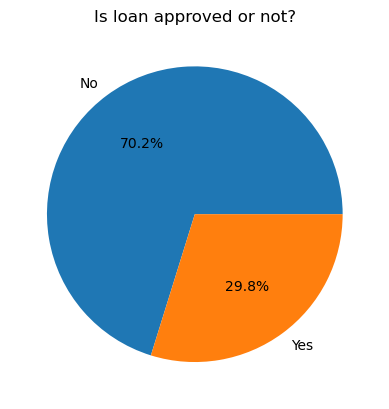

In [ ]:
# How balanced our classes in result are?
# We can find the calsses in our output
classes_count = df["Loan_Approved"].value_counts()
classes_count
# When we have 2 or more categories, it makes more sense to plot it in pie chart
plt.pie(classes_count, labels=["No", "Yes"], autopct="%1.1f%%")
plt.title("Is loan approved or not?")

# Even in real life the classes will not be balanced, but be like this

## We can explore each column that has categorical values and see the classes




Education_Level
Graduate        722
Not Graduate    278
Name: count, dtype: int64

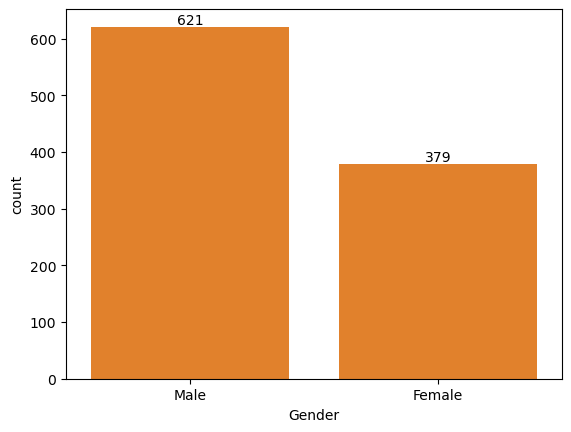

In [ ]:
gender_cnt = df["Gender"].value_counts()
gender_cnt

sns.barplot(gender_cnt)
ax = sns.barplot(gender_cnt)
ax.bar_label(ax.containers[0])
df.columns



Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income',
       'Employment_Status', 'Age', 'Marital_Status', 'Dependents',
       'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term', 'Loan_Purpose',
       'Property_Area', 'Education_Level', 'Gender', 'Employer_Category',
       'Loan_Approved'],
      dtype='object')

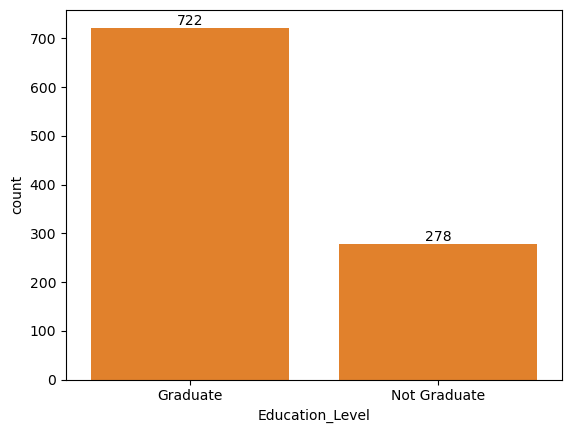

In [25]:
education_level_cnt = df["Education_Level"].value_counts()
education_level_cnt

sns.barplot(education_level_cnt)
ax = sns.barplot(education_level_cnt)
ax.bar_label(ax.containers[0])
df.columns

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income',
       'Employment_Status', 'Age', 'Marital_Status', 'Dependents',
       'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term', 'Loan_Purpose',
       'Property_Area', 'Education_Level', 'Gender', 'Employer_Category',
       'Loan_Approved'],
      dtype='object')

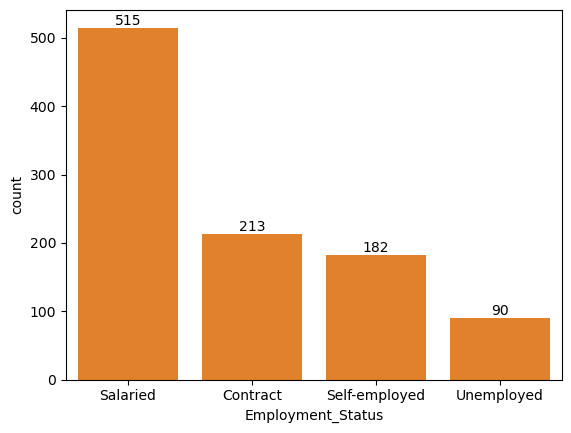

In [27]:
emp_status_cnt = df["Employment_Status"].value_counts()
emp_status_cnt

sns.barplot(emp_status_cnt)
ax = sns.barplot(emp_status_cnt)
ax.bar_label(ax.containers[0])
df.columns

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income',
       'Employment_Status', 'Age', 'Marital_Status', 'Dependents',
       'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term', 'Loan_Purpose',
       'Property_Area', 'Education_Level', 'Gender', 'Employer_Category',
       'Loan_Approved'],
      dtype='object')

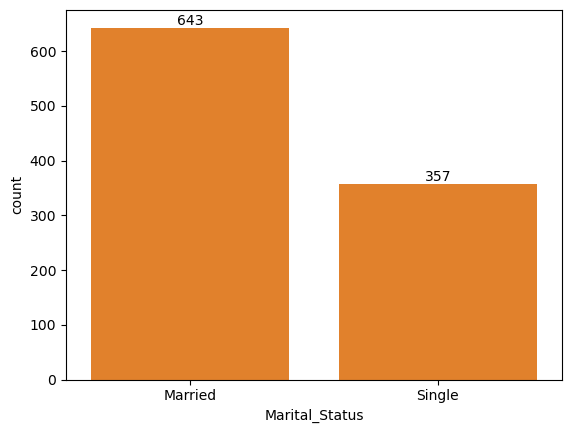

In [28]:
marital_status_cnt = df["Marital_Status"].value_counts()
marital_status_cnt

sns.barplot(marital_status_cnt)
ax = sns.barplot(marital_status_cnt)
ax.bar_label(ax.containers[0])
df.columns

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income',
       'Employment_Status', 'Age', 'Marital_Status', 'Dependents',
       'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term', 'Loan_Purpose',
       'Property_Area', 'Education_Level', 'Gender', 'Employer_Category',
       'Loan_Approved'],
      dtype='object')

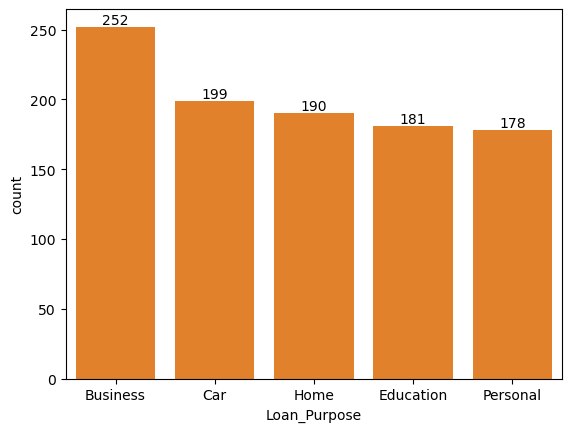

In [29]:
loan_purpose_cnt = df["Loan_Purpose"].value_counts()
loan_purpose_cnt

sns.barplot(loan_purpose_cnt)
ax = sns.barplot(loan_purpose_cnt)
ax.bar_label(ax.containers[0])
df.columns

<Axes: xlabel='Applicant_Income', ylabel='Count'>

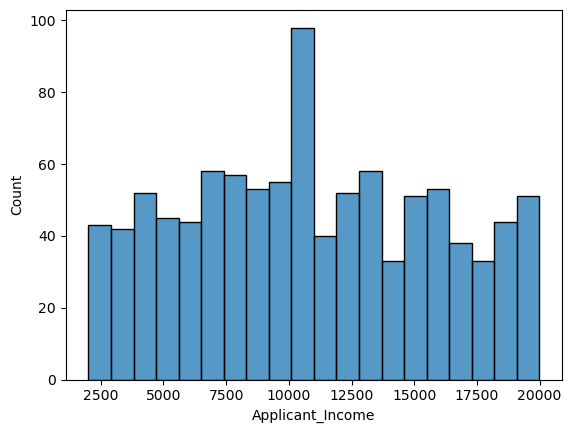

In [30]:
# Analyze the income as it is most important in real-life
sns.histplot(
    data=df, 
    x="Applicant_Income",
    bins=20
)

<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

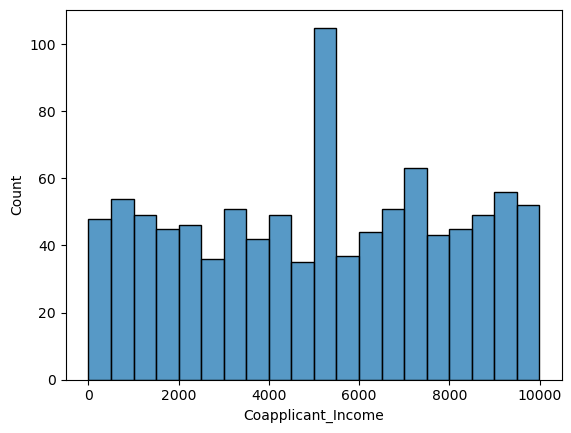

In [31]:
# Analyze the co-applicant income as it is also an important in real-life
sns.histplot(
    data=df, 
    x="Coapplicant_Income",
    bins=20
)

## No outliers in our data so far

<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

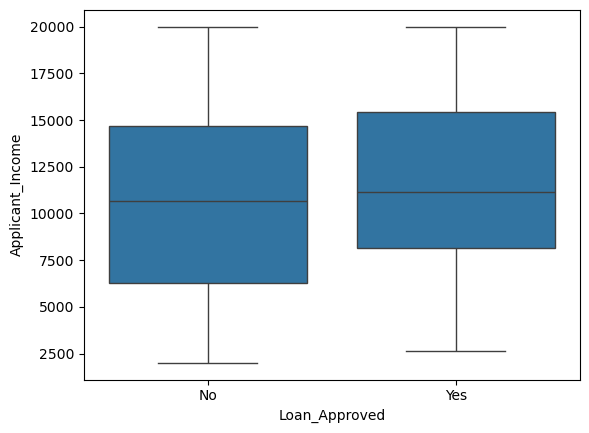

In [33]:
# Box Plots for our outliers
sns.boxplot(
    data=df,
    x="Loan_Approved",
    y="Applicant_Income"
)

## We can create a box plot for each numerical ldata like in DTI Ratio, Savings to check if there are any outliers

<Axes: xlabel='Loan_Approved', ylabel='Savings'>

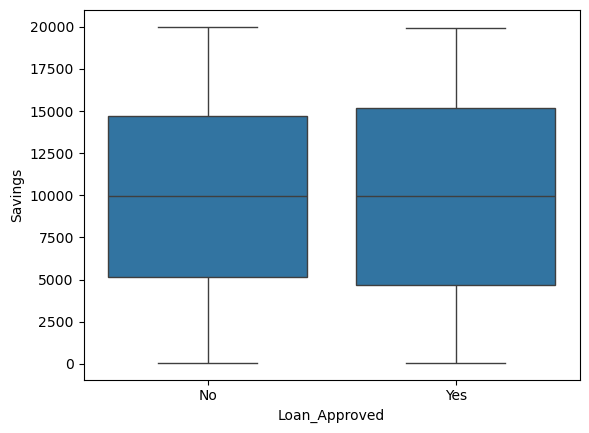

In [34]:
# Box Plots for our outliers
sns.boxplot(
    data=df,
    x="Loan_Approved",
    y="Savings"
)

<Axes: xlabel='Loan_Approved', ylabel='DTI_Ratio'>

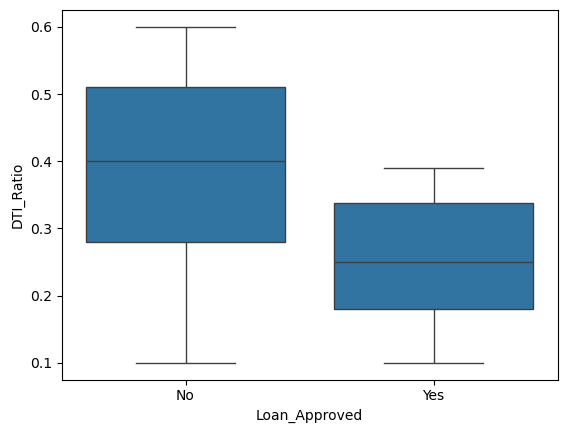

In [36]:
# Box Plots for our outliers
sns.boxplot(
    data=df,
    x="Loan_Approved",
    y="DTI_Ratio"
)

## If we happen to have some meaning less outliers like dependants = -1
## We need to remove those meaning less outliers/wrong outliers
## If age happens to be 10 years or 150 years => illogical ,needs to be removed

## If we analyse the savings of 1000 applicants and their combined savings comes up to be 
## 100Cr, but 999 people combined savings is 50 cr, but there is one individual whose savings alone is 50 cr
## Thing like above is meaning less, we need to remove that particular outlier to prevent our mode from getting skewed

<Axes: xlabel='Credit_Score', ylabel='Count'>

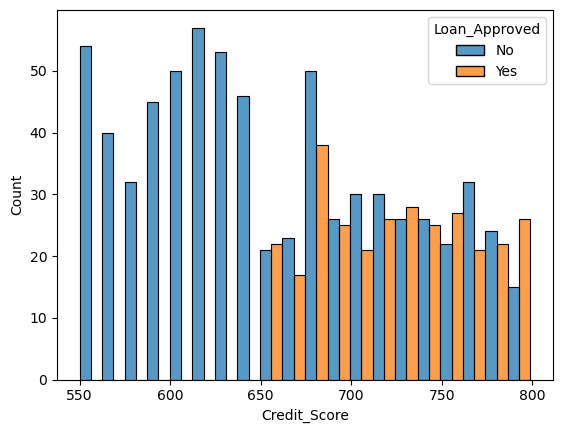

In [40]:
# Let's analyse the relationship b/w credit score and loan approval

sns.histplot(
    data=df,
    x="Credit_Score",
    hue="Loan_Approved",
    bins=20,
    multiple="dodge"
)

## From the above plot we can deduce that having a high credit score leads to high loan approval rates

<Axes: xlabel='Applicant_Income', ylabel='Count'>

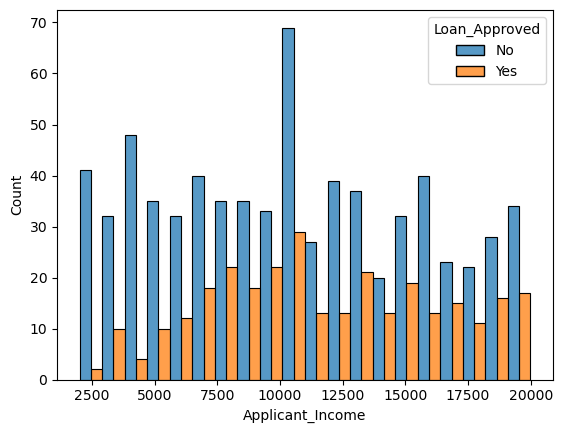

In [42]:
# Let's analyse the relationship b/w income and loan approval

sns.histplot(
    data=df,
    x="Applicant_Income",
    hue="Loan_Approved",
    bins=20,
    multiple="dodge"
)

<Axes: xlabel='Existing_Loans', ylabel='Count'>

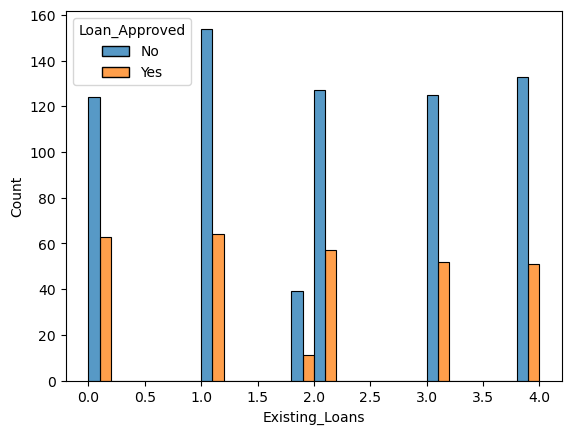

In [49]:
# Let's analyse the relationship b/w existing loans and loan approval

sns.histplot(
    data=df,
    x="Existing_Loans",
    hue="Loan_Approved",
    bins=20,
    multiple="dodge"
)

<Axes: xlabel='Dependents', ylabel='Count'>

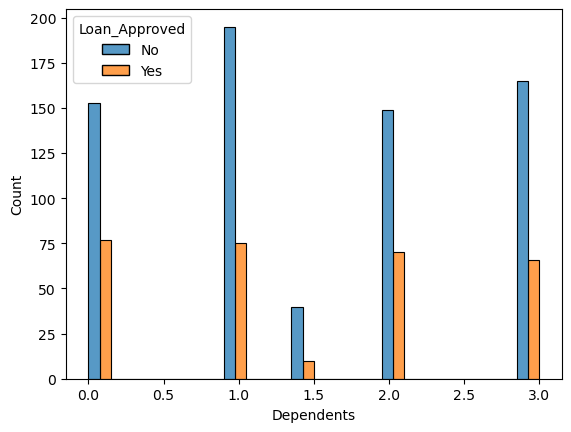

In [50]:
# Let's analyse the relationship b/w no of dependants and loan approval

sns.histplot(
    data=df,
    x="Dependents",
    hue="Loan_Approved",
    bins=20,
    multiple="dodge"
)

In [47]:
## Remove Applicant Id assigned by bank
df=df.drop("Applicant_ID", axis=1)

In [48]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


## Encoding 
### Binary Encoding
### One hot encoding
#### Label Encoder
#### One hot Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Label Encoder = > Assigns an inteegr for each category ==> For ordinal data
# One Hot Encode = > Creates Binary columns for each category ==> For nominal data